# 逻辑回归（Logistic Regression）
逻辑回归是一种用于分类问题的统计方法，尽管名字中有“回归”二字，但它实际上是一种分类算法。

逻辑回归通过使用逻辑函数（如sigmoid函数）将线性组合的输入特征映射到一个概率值，从而实现对类别的预测。

## 逻辑回归模型
逻辑回归的目标是预测一个二分类结果（0或1）。通过以下公式建立模型：
$$P(Y=1|X) = \sigma(w^TX + b)$$
- $X$：输入特征向量，可以是多个特征组成的向量；
- $w$：权重向量，表示每个特征对预测结果的影响；
- $b$：偏置项，帮助调整模型的输出；
- $\sigma(z)$：逻辑函数（sigmoid函数），定义为 $\sigma(z) = \frac{1}{1 + e^{-z}}$，将线性组合的结果映射到0到1之间的概率值。

## 损失函数
逻辑回归使用对数损失函数（Log Loss）来衡量模型的预测与实际标签之间的差异。其形式为：
$$J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$$
- $m$：样本数量；
- $y^{(i)}$：第$i$个样本的实际标签（0或1）；
- $\hat{y}^{(i)}$：第$i$个样本的预测概率。

### 梯度下降法求解
与线性回归类似，逻辑回归也可以使用梯度下降法来优化损失函数，梯度计算如下：
$$\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) X^{(i)}$$
$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$


更新权重和偏置：
$$w := w - \alpha \frac{\partial J(w, b)}{\partial w}$$
$$b := b - \alpha \frac{\partial J(w, b)}{\partial b}$$
- $\alpha$：学习率，控制每次更新的步长。
- 通过不断迭代更新权重和偏置，直到损失函数收敛或达到预设的迭代次数。

## Python实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = (iris.target !=0) * 1  # Convert to binary classification problem

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [2]:
# evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[19  0]
 [ 0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



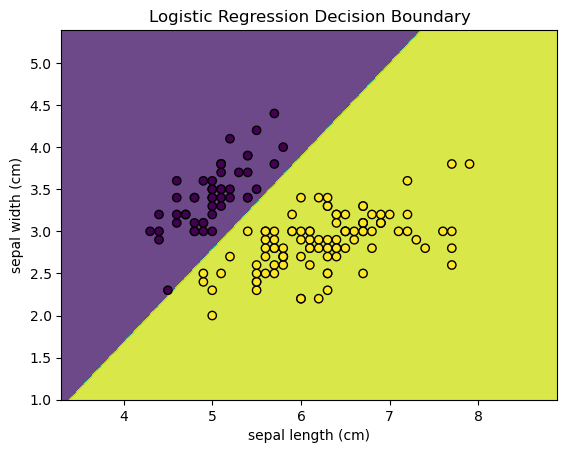

In [6]:
# visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Logistic Regression Decision Boundary')
plt.show()

### 总结：
- 逻辑回归通过使用`sigmoid`函数将线性组合的输入特征映射到概率值，实现对二分类问题的预测。
- 损失函数采用对数损失函数，通过梯度下降法优化模型参数。
- 梯度下降法是一种常用的优化算法，通过计算损失函数的梯度来更新模型参数，逐步逼近最优解。
- python的`scikit-learn`库提供了方便的逻辑回归实现，可以直接使用`LogisticRegression`类进行模型训练和预测。